# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

In [2]:
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


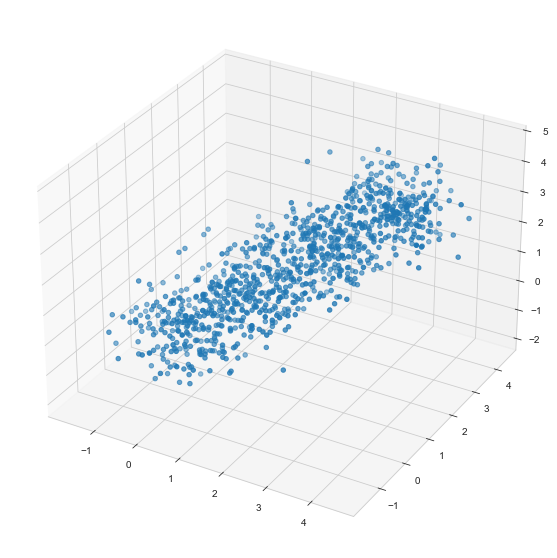

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
axes.scatter3D(data['A'],data['B'],data['C'])

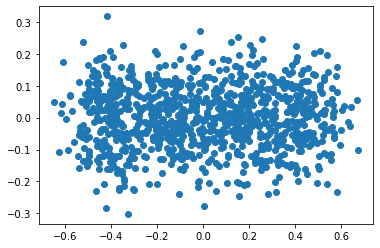

In [11]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


scaled_data = MinMaxScaler().fit_transform(data)
pca = PCA(n_components=2).fit(scaled_data)
decomposed_features = pca.transform(scaled_data)

plt.scatter(x=decomposed_features[:,0], y = decomposed_features[:,1])

In [22]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(decomposed_features)
    inertia.append(kmeans.inertia_)

C:\Users\austi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


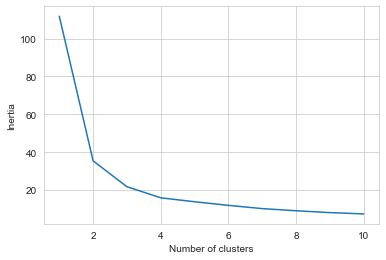

In [23]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(decomposed_features)
clusters = kmeans.fit_predict(decomposed_features)

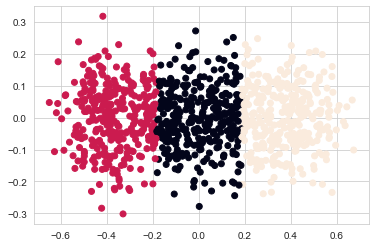

In [29]:
plt.scatter(x=decomposed_features[:,0], y = decomposed_features[:,1],c=clusters)


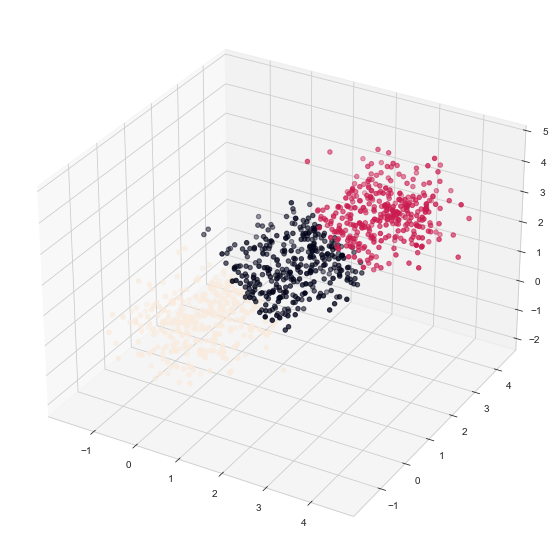

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
axes.scatter(data['A'],data['B'],data['C'], c=clusters)